In [1]:
import pandas as pd

# Cargar los datasets
df_movies_api_acotado = pd.read_parquet('movies_api_acotado_datasets.parquet')
df_cast_api = pd.read_csv("cast_dataset.csv")
df_crew_api = pd.read_csv("crew_dataset.csv")

In [3]:
# Valores nulos en df_movies_api_acotado
print("Valores nulos en df_movies_api_acotado")
print(df_movies_api_acotado.isnull().sum())

Valores nulos en df_movies_api_acotado
id_collection              36779
name_collection            36779
budget                         0
id                             0
original_language             10
overview                     634
popularity                     0
release_date                   0
revenue                        0
runtime                        0
status                        66
title                          0
vote_average                   0
vote_count                     0
return                         0
release_year                   0
id_genres                    406
name_genres                  406
iso_3166_1_country          4002
country                     3999
production_companies           0
id_production_companies        0
dtype: int64


In [4]:
# Valores nulos en df_cast_api
print("\nValores nulos en df_cast_api")
print(df_cast_api.isnull().sum())


Valores nulos en df_cast_api
cast_id          0
id               0
name             0
character    25523
credit_id        0
dtype: int64


In [5]:
# Valores nulos en df_crew_api
print("\nValores nulos en df_crew_api")
print(df_crew_api.isnull().sum())


Valores nulos en df_crew_api
credit_id     0
id            0
name          0
department    0
job           0
dtype: int64


In [7]:
# Valores duplicados en df_movies_api_acotado
print("\nValores duplicados en df_movies_api_acotado:", df_movies_api_acotado.duplicated().sum())

# Valores duplicados en df_cast_api
print("Valores duplicados en df_cast_api:", df_cast_api.duplicated().sum())

# Valores duplicados en df_crew_api
print("Valores duplicados en df_crew_api:", df_crew_api.duplicated().sum())



Valores duplicados en df_movies_api_acotado: 0
Valores duplicados en df_cast_api: 430
Valores duplicados en df_crew_api: 458


In [9]:
# Porcentaje de valores faltantes en df_movies_api_acotado
print("\nPorcentaje de valores faltantes en df_movies_api_acotado")
print(df_movies_api_acotado.isnull().mean() * 100)


Porcentaje de valores faltantes en df_movies_api_acotado
id_collection              89.930802
name_collection            89.930802
budget                      0.000000
id                          0.000000
original_language           0.024452
overview                    1.550236
popularity                  0.000000
release_date                0.000000
revenue                     0.000000
runtime                     0.000000
status                      0.161381
title                       0.000000
vote_average                0.000000
vote_count                  0.000000
return                      0.000000
release_year                0.000000
id_genres                   0.992738
name_genres                 0.992738
iso_3166_1_country          9.785559
country                     9.778223
production_companies        0.000000
id_production_companies     0.000000
dtype: float64


In [13]:
# Porcentaje de valores faltantes en df_cast_api
print("\nPorcentaje de valores faltantes en df_cast_api")
print(df_cast_api.isnull().mean() * 100)

# Porcentaje de valores faltantes en df_crew_api
print("\nPorcentaje de valores faltantes en df_crew_api")
print(df_crew_api.isnull().mean() * 100)


Porcentaje de valores faltantes en df_cast_api
cast_id      0.000000
id           0.000000
name         0.000000
character    4.552248
credit_id    0.000000
dtype: float64

Porcentaje de valores faltantes en df_crew_api
credit_id     0.0
id            0.0
name          0.0
department    0.0
job           0.0
dtype: float64


In [15]:
# Tipos de datos en df_movies_api_acotado
print("\nTipos de datos en df_movies_api_acotado")
print(df_movies_api_acotado.dtypes)


Tipos de datos en df_movies_api_acotado
id_collection              float64
name_collection             object
budget                       int64
id                           int64
original_language           object
overview                    object
popularity                 float64
release_date                object
revenue                      int64
runtime                      int64
status                      object
title                       object
vote_average               float64
vote_count                   int64
return                     float64
release_year                 int64
id_genres                  float64
name_genres                 object
iso_3166_1_country          object
country                     object
production_companies        object
id_production_companies      int64
dtype: object


In [16]:
# Tipos de datos en df_cast_api
print("\nTipos de datos en df_cast_api")
print(df_cast_api.dtypes)

# Tipos de datos en df_crew_api
print("\nTipos de datos en df_crew_api")
print(df_crew_api.dtypes)


Tipos de datos en df_cast_api
cast_id       int64
id            int64
name         object
character    object
credit_id    object
dtype: object

Tipos de datos en df_crew_api
credit_id     object
id             int64
name          object
department    object
job           object
dtype: object


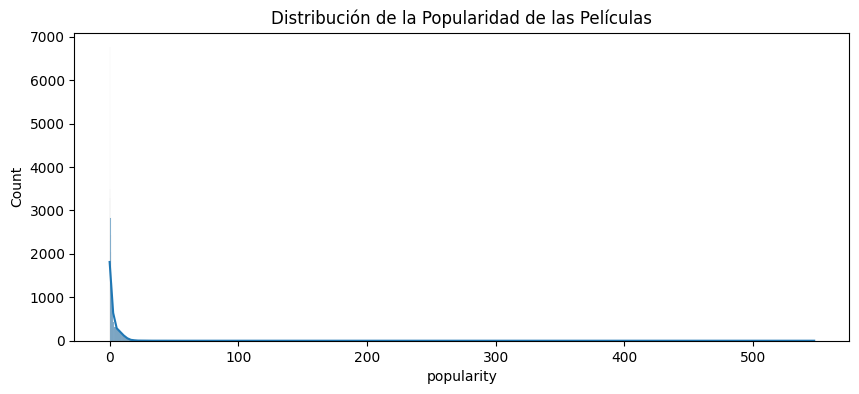

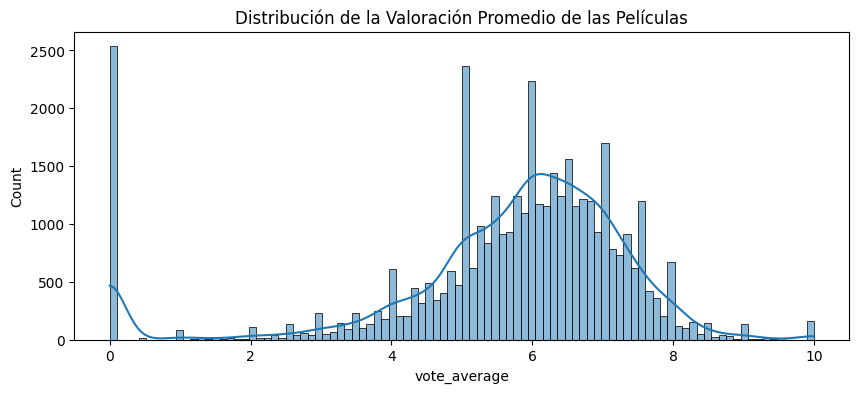

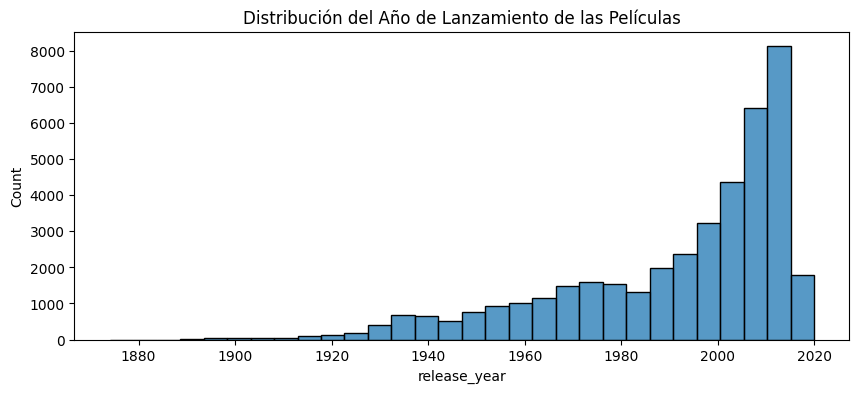

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la popularidad
plt.figure(figsize=(10, 4))
sns.histplot(df_movies_api_acotado['popularity'], kde=True)
plt.title('Distribución de la Popularidad de las Películas')
plt.show()

# Distribución del promedio de votos
plt.figure(figsize=(10, 4))
sns.histplot(df_movies_api_acotado['vote_average'], kde=True)
plt.title('Distribución de la Valoración Promedio de las Películas')
plt.show()

# Distribución del año de lanzamiento
plt.figure(figsize=(10, 4))
sns.histplot(df_movies_api_acotado['release_year'], kde=False, bins=30)
plt.title('Distribución del Año de Lanzamiento de las Películas')
plt.show()


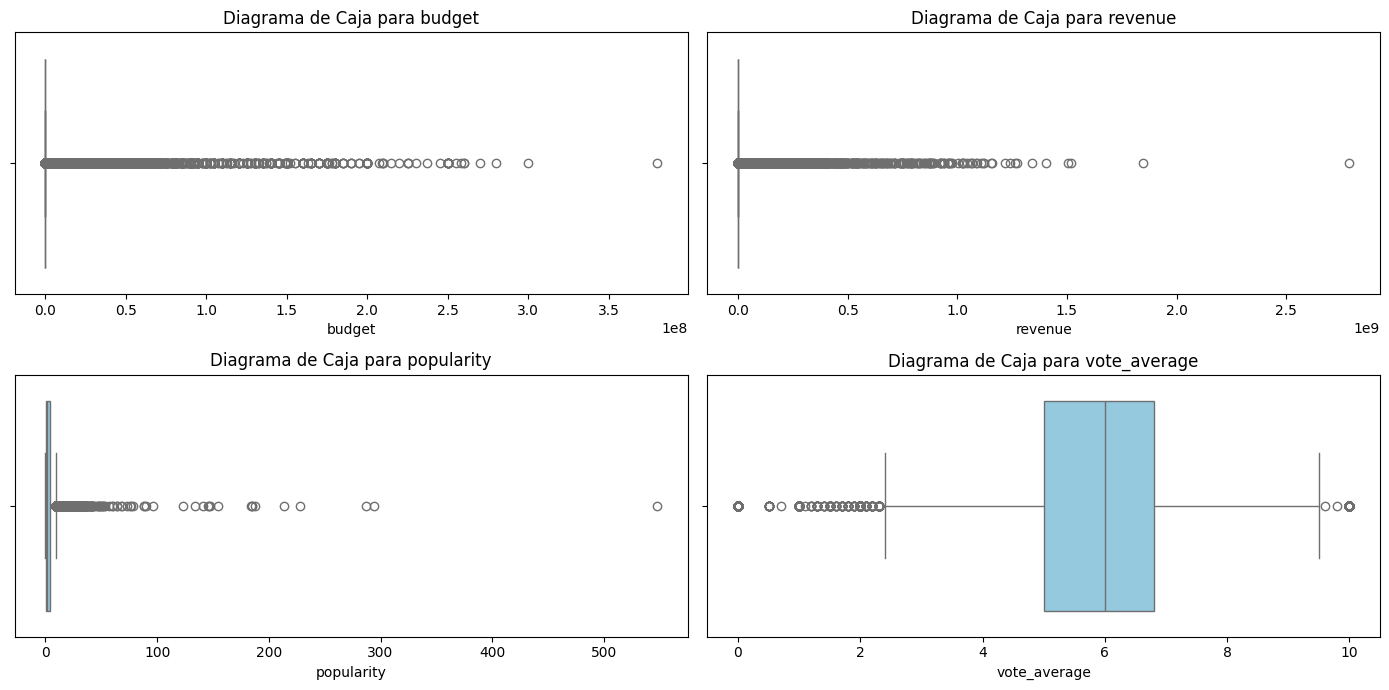

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 7))

for i, column in enumerate(['budget', 'revenue', 'popularity', 'vote_average'], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_movies_api_acotado, x=column, color='skyblue')
    plt.title(f'Diagrama de Caja para {column}')

plt.tight_layout()
plt.show()
